<a href="https://colab.research.google.com/github/LeoSotoG/Loan-Approval-Classification-Model/blob/main/Loan_Approval_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto**

**Contexto:**
Una empresa se ocupa de otorgar las tarjetas de credito.

La empresa quiere automatizar el proceso de elegibilidad de dar o no la tarjeta de credito (en tiempo real) en función de los detalles proporcionados por el cliente al completar el formulario de solicitud en línea. Con ayuda de los datos de clientes pasados.

##**Column information**
* **id** : ID del cliente.
* **age** : Edad del cliente en años completos.
* **experience** : Años de experiencia profesional.
* **income** : Ingresos anuales del cliente.
* **zip_code** : Código postal de la dirección.
* **family** : Tamaño de la familia del cliente.
* **ccavg** : Promedio de gasto en tarjetas de crédito por mes.
* **education** : Nivel de educación.
** Undergrad: Estudiante Universitario
** Graduate: Graduado
** Advanced/Professional: Avanzado/Profesional
* **mortgage** : Valor de la hipoteca de la vivienda, en su caso.
* **personal_loan** : ¿Este cliente aceptó el préstamo personal ofrecido en la última campaña? (1:Sí, 0:No)
* **securities_account** : ¿Tiene el cliente una cuenta de valores en el banco? (1:Sí, 0:No)
* **cd_account** : ¿Tiene el cliente una cuenta de certificado de depósito (CD) en el banco? (1:Sí, 0:No)
* **online** : ¿Utiliza el cliente servicios de banca por Internet? (1:Sí, 0:No)
* **creditcard** : ¿Fue otorgada la tarjeta de credito? (1:Sí, 0:No)



##Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##Load Data

In [2]:
# Lectura de los datos
df = pd.read_csv("Bank_Personal_Loan.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Despues de una vista previa de los datos, no se encuentran nulos pero encontre las siguientes obervaciones:
* Experience: hay valores negativos y se supone que no deberia haber años de experiencia negativos
* Puede que existan valores outliers.
* ID: la columna ID no seria relevante porque solo se utiliza como identificador.

## Data processing

###Outliers

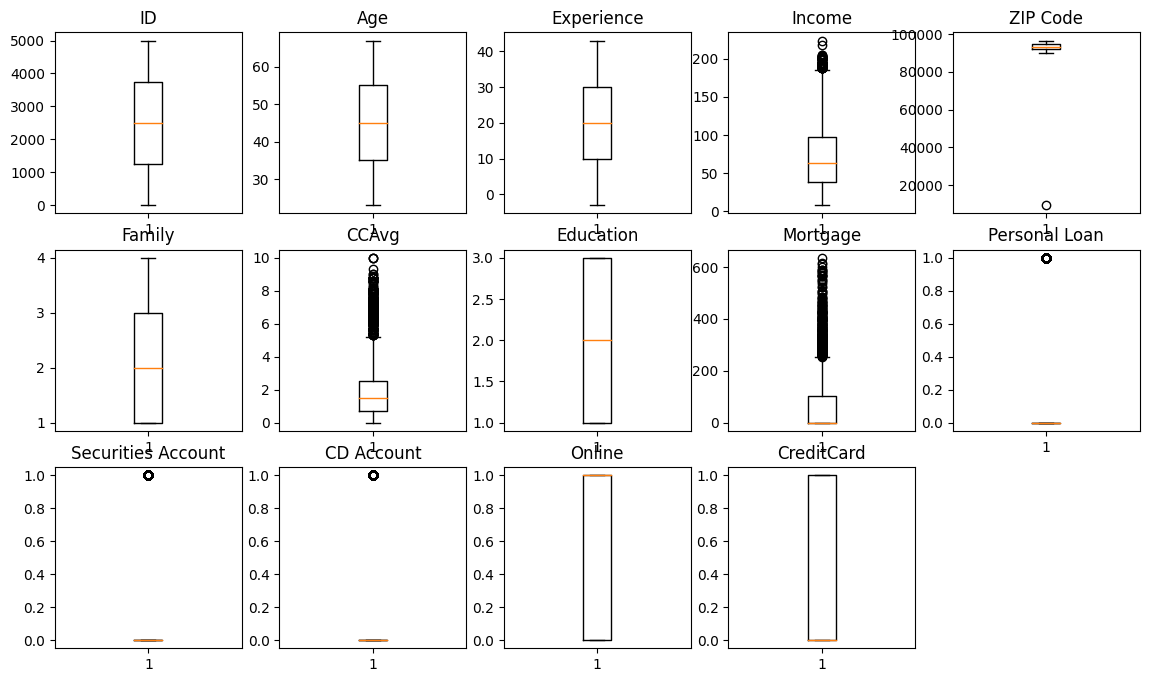

In [8]:
# Definiendo una figura para ver las subfiguras e identificar si cuenta con outliers
fig = plt.figure(figsize=(14, 8))

# Agregando las subfiguras
for i, col in enumerate(df.columns):
  ax = fig.add_subplot(3, 5, i+1)
  ax.boxplot(df[col])
  ax.set_title(col)

plt.show()

Se pueden identificar algunos outliers en pocas variables, pero pueden meter ruido al modelo y tambien se pueden notar las distintas escalas de los datos.

###IQR

In [9]:
var_outliers = ["Income", "ZIP Code", "CCAvg", "Mortgage"]

In [10]:
# Quantile 1 y 3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Obteniendo el IQR
IQR = Q3 - Q1

# Inicializar una máscara para todas las filas
mask_total = pd.Series(True, index=df.index)

# Calcular y combinar las máscaras para cada columna
for col in var_outliers:
    mask = ~((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col])))
    # Alinear las máscaras para asegurarse de que tengan el mismo índice
    mask = mask.reindex(mask_total.index, fill_value=False)
    # Combinar las máscaras
    mask_total &= mask

len(df), len(df[mask_total])
# Perdimos 603 filas

(5000, 4397)

In [11]:
# Aplicando estos cambios
df = df[mask_total]

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000
mean,2511.599045,45.535365,20.279281,64.094383,93175.939277,2.438708,1.551362,1.922675,38.499431,0.062088,0.104389,0.047078,0.593814,0.295429
std,1447.293927,11.491301,11.510499,38.023417,1761.647113,1.159948,1.157577,0.835641,68.113386,0.241342,0.305800,0.211829,0.491176,0.456287
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.000000,35.000000,10.000000,35.000000,91941.000000,1.000000,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2518.000000,46.000000,20.000000,58.000000,93524.000000,2.000000,1.400000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3766.000000,56.000000,30.000000,83.000000,94609.000000,4.000000,2.200000,3.000000,83.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,185.000000,96651.000000,4.000000,5.200000,3.000000,252.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Exploratory Analysis

En este caso en especifico no se cuentan con variables categoricas, entonces solo seran variables numericas.

In [12]:
# Variables numericas
var_n = ["Income", "ZIP Code",	"Family",	"CCAvg",	"Education",	"Mortgage",
             "Personal Loan",	"Securities Account",	"CD Account",	"Online"]

###Univariate Analysis

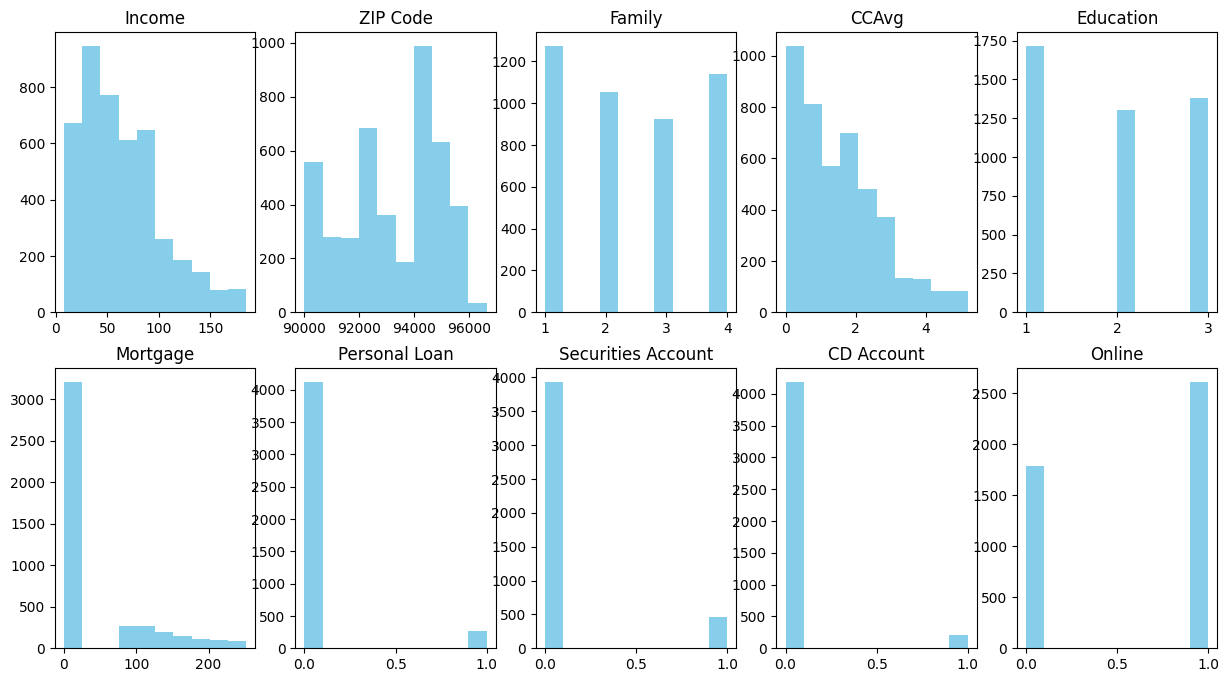

In [13]:
# Definiendo figura
fig = plt.figure(figsize=(15,8))

# Imprimiendo subfiguras
for i, col in enumerate(var_n):
  ax = fig.add_subplot(2 , 5, i+1)
  ax.hist(df[col], color="skyblue")
  ax.set_title(col)

plt.show()

###Bivariate Analysis

####Heatmap

In [14]:
# Descargar en una variable la matriz de correlación
matriz_Corr = df.corr()
matriz_Corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.004076,-0.003036,-0.009937,-0.005933,-0.021758,-0.003841,0.024340,-0.017454,-0.021866,-0.019525,-0.008293,-0.007816,0.017305
Age,-0.004076,1.000000,0.994115,-0.035687,-0.031874,-0.059044,-0.023693,0.034540,-0.007516,-0.015105,0.005714,0.005998,0.018465,0.010914
Experience,-0.003036,0.994115,1.000000,-0.027902,-0.031188,-0.064074,-0.026331,0.006621,-0.006813,-0.011894,0.004318,0.008508,0.018138,0.012397
Income,-0.009937,-0.035687,-0.027902,1.000000,-0.029612,-0.138122,0.518454,-0.148813,-0.056633,0.466310,0.001637,0.114763,0.004404,0.004647
ZIP Code,-0.005933,-0.031874,-0.031188,-0.029612,1.000000,0.023883,-0.018964,-0.015747,0.006339,0.000712,-0.003311,0.017669,0.038226,0.019836
Family,-0.021758,-0.059044,-0.064074,-0.138122,0.023883,1.000000,-0.056942,0.023976,0.027052,0.012378,0.022852,-0.000752,0.014586,0.001340
CCAvg,-0.003841,-0.023693,-0.026331,0.518454,-0.018964,-0.056942,1.000000,-0.070466,-0.018283,0.328329,0.020348,0.082749,-0.021067,-0.001779
Education,0.024340,0.034540,0.006621,-0.148813,-0.015747,0.023976,-0.070466,1.000000,0.010710,0.097127,-0.015585,-0.006417,-0.024443,-0.017632
Mortgage,-0.017454,-0.007516,-0.006813,-0.056633,0.006339,0.027052,-0.018283,0.010710,1.000000,-0.027418,-0.009067,0.009611,-0.010274,-0.001704
Personal Loan,-0.021866,-0.015105,-0.011894,0.466310,0.000712,0.012378,0.328329,0.097127,-0.027418,1.000000,0.016958,0.245387,-0.015565,-0.005478


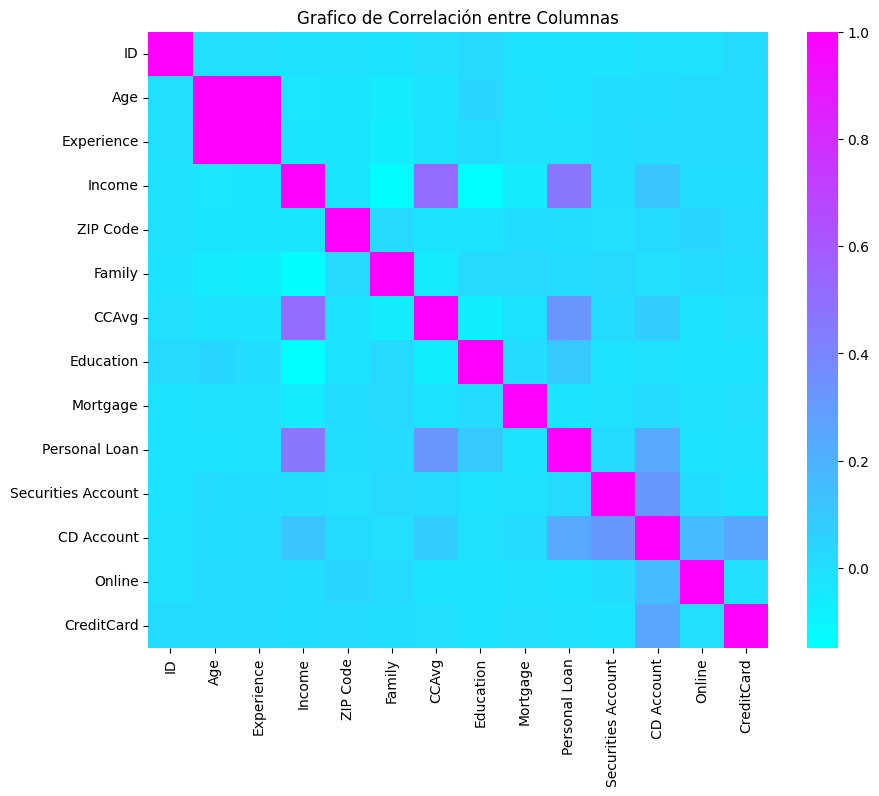

In [15]:
# Grafico de Calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_Corr, annot=False, cmap="cool", fmt=".2f")
plt.title("Grafico de Correlación entre Columnas")
plt.show()

In [16]:
# Correlación de Pearson
correlation_pearson = df.corrwith(df["CreditCard"], method="pearson")
correlation_pearson

ID                    0.017305
Age                   0.010914
Experience            0.012397
Income                0.004647
ZIP Code              0.019836
Family                0.001340
CCAvg                -0.001779
Education            -0.017632
Mortgage             -0.001704
Personal Loan        -0.005478
Securities Account   -0.018914
CD Account            0.258526
Online               -0.001385
CreditCard            1.000000
dtype: float64

In [17]:
# Correlación de Spearman
correlation_spearman = df.corrwith(df["CreditCard"], method="spearman")
correlation_spearman

ID                    0.017363
Age                   0.010067
Experience            0.011707
Income                0.000977
ZIP Code              0.018415
Family                0.002202
CCAvg                -0.001075
Education            -0.018134
Mortgage             -0.002684
Personal Loan        -0.005478
Securities Account   -0.018914
CD Account            0.258526
Online               -0.001385
CreditCard            1.000000
dtype: float64

##Preprocess Data

In [18]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
numerical_features = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online']

In [20]:
y = df["CreditCard"]

In [21]:
numerical_data = df[numerical_features]

In [22]:
# Libreria para escalar los datos
from sklearn.preprocessing import StandardScaler

# Definiendo el escalador
scaler = StandardScaler()
scaler.fit(numerical_data)

numerical_data_preprocessed = scaler.fit_transform(numerical_data)

##Visualize Data

In [23]:
from sklearn.decomposition import PCA

# Obtencion de componentes principales
pca = PCA(n_components=2)

# Transformación de PCA
datos_transformados = pca.fit_transform(numerical_data_preprocessed)

# Ahora vamos a crear un DataFrame con los datos transformados
dtra_df = pd.DataFrame(datos_transformados, columns=[f'Componente{i}' for i in range(1, pca.n_components_+1)])

# Definir una figura y poner los componentes obtenidos
fig = px.scatter(dtra_df, x='Componente1', y="Componente2")

# Mostrar la figura
fig.show()

##Train, Test, Split

In [24]:
from sklearn.model_selection import train_test_split

# Obteniendo datos de Entrenamiento y prueba
train, test, train_y, test_y =  train_test_split(numerical_data_preprocessed, y,
                                        test_size = 0.30)



##Model Data

"entrenar" sera una funcion que se utiliza para buscar los mejores hiperparámetros para un modelo de aprendizaje automático utilizando una búsqueda aleatoria:

**1.-**

* "param": Un diccionario que contiene los rangos o distribuciones de valores para los hiperparámetros que se van a buscar.
* "modelo": El estimador de scikit-learn que se utilizará, por ejemplo, RandomForestClassifier().
* "X": Las características de entrenamiento.
* "y": La variable objetivo.

**2.-**

* "param_distributions": Un diccionario que contiene los rangos o distribuciones de valores para los hiperparámetros que se van a buscar.
* "n_jobs": Número de trabajos en paralelo. -1 significa utilizar todos los procesadores.
* "n_iter": Número de iteraciones para la búsqueda aleatoria.
* "cv": Número de divisiones para la validación cruzada.
* "estimator": El estimador de scikit-learn que se utilizará.
* "error_score": Qué hacer si ocurre un error al ajustar un modelo. En este caso, se elevará una excepción ("raise").

**3.-**

* "grid.fit(X,y)": Se ajusta el objeto grid a los datos de entrenamiento (X e y), lo que realiza la búsqueda aleatoria de hiperparámetros y evalúa el rendimiento del modelo para cada combinación de hiperparámetros utilizando validación cruzada.

**4.-**

return grid, grid.best_estimator_, grid.best_score_, grid.best_params_: Esta línea devuelve cuatro valores:

* grid: El objeto RandomizedSearchCV que contiene los resultados completos de la búsqueda aleatoria.

* grid.best_estimator_: El mejor estimador encontrado durante la búsqueda aleatoria, es decir, el modelo con los mejores hiperparámetros.

* grid.best_score_: El mejor puntaje obtenido durante la búsqueda aleatoria.

* grid.best_params_: Los mejores hiperparámetros encontrados durante la búsqueda aleatoria.

In [25]:
from sklearn.model_selection import RandomizedSearchCV

def entrenar(param, modelo, X,y):
    grid = RandomizedSearchCV(param_distributions=param,
                             n_jobs=-1,
                             n_iter=10,
                             cv=4,
                             estimator=modelo,
                             error_score='raise')
    grid.fit(X,y)
    return grid, grid.best_estimator_, grid.best_score_, grid.best_params_


La siguiente función `metricas` calcula el área bajo la curva ROC (AUC-ROC) para un modelo dado en conjuntos de entrenamiento y validación. Aquí está una explicación línea por línea:

1. `from sklearn.metrics import roc_auc_score`: Importa la función `roc_auc_score` de scikit-learn, que se utiliza para calcular el área bajo la curva ROC.

2. `def metricas(Xt, Xv, yt, yv, modelo):`: Define una función llamada `metricas` que toma cinco argumentos: `Xt`, `Xv`, `yt`, `yv`, y `modelo`.
   - `Xt`: Características del conjunto de entrenamiento.
   - `Xv`: Características del conjunto de validación.
   - `yt`: Etiquetas del conjunto de entrenamiento.
   - `yv`: Etiquetas del conjunto de validación.
   - `modelo`: El modelo entrenado para el que se calcularán las métricas.

3. `d = {'train':round(roc_auc_score(y_true=yt, y_score=modelo.predict_proba(Xt)[:,1]),3),`: Calcula el AUC-ROC para el conjunto de entrenamiento utilizando las etiquetas verdaderas (`yt`) y las probabilidades predichas del modelo (`modelo.predict_proba(Xt)[:,1]`). Se utiliza `[:,1]` para obtener las probabilidades de la clase positiva. El resultado se redondea a 3 decimales y se guarda en un diccionario con la clave `'train'`.

4. `'validate':round(roc_auc_score(y_true=yv, y_score=modelo.predict_proba(Xv)[:,1]),3)`: Calcula el AUC-ROC para el conjunto de validación de manera similar al paso anterior y lo guarda en el diccionario con la clave `'validate'`.

5. `return d`: Devuelve el diccionario `d` que contiene las métricas calculadas para los conjuntos de entrenamiento y validación. El AUC-ROC es una métrica comúnmente utilizada para evaluar modelos de clasificación binaria, donde valores más altos indican un mejor rendimiento del modelo.

In [26]:
from sklearn.metrics import roc_auc_score

def metricas(Xt, Xv, yt, yv, modelo):
    d = {'train':round(roc_auc_score(y_true=yt, y_score=modelo.predict_proba(Xt)[:,1]),3),
         'validate':round(roc_auc_score(y_true=yv, y_score=modelo.predict_proba(Xv)[:,1]),3)
        }
    return d

###KNN

In [27]:
# Parametros del modelo KNN
param = dict(n_neighbors= (range(10, 16)),  # Número de vecinos a considerar
          weights=["uniform", "distance"],  # Método de ponderación de los vecinos
          metric= ["euclidean", "manhattan"],  # Métrica de distancia utilizada
          algorithm= ["auto", "ball_tree", "kd_tree", "brute"],  # Algoritmo utilizado para calcular los vecinos más cercanos
          p= [1, 2]  # Parámetro de potencia para la distancia de Minkowski
          )

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Definiendo el calsificador
modelo = KNeighborsClassifier()
modelo, best_estimator, score, params = entrenar(param, modelo, train, train_y)
metricas(train,test,train_y,test_y,modelo)

{'train': 0.731, 'validate': 0.607}

In [29]:
best_estimator

KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=14)

### RandomForestClassifier

In [30]:
param_rf = dict(n_estimators=list(range(1, 100, 25)),                 # Define una lista de valores para el número de árboles en el bosque
                criterion=['gini', 'entropy'],                        # Define los criterios de medida para la calidad de la división
                max_depth=[x for x in list(range(2, 5))] + [None],    # Define la profundidad máxima de los árboles
                min_samples_split=[x for x in list(range(2, 4))],     # Define el número mínimo de muestras requeridas para dividir un nodo interno
                min_samples_leaf=[x for x in list(range(2, 4))],      # Define el número mínimo de muestras requeridas para ser un nodo hoja
                max_features=[None] + [i * .05 for i in list(range(2, 4))],  # Define el número máximo de características a considerar para la mejor división
                max_leaf_nodes=list(range(2, 10)) + [None],           # Define el número máximo de nodos hoja permitidos en cada árbol
                min_impurity_decrease=[x * .10 for x in list(range(2, 4))],  # Define la cantidad mínima de reducción de impureza requerida para dividir un nodo
                oob_score=[True,False],                               # Indica si se debe usar el error fuera de la bolsa para estimar el rendimiento del modelo
                warm_start=[True, False],                             # Indica si se debe reutilizar la solución de la llamada anterior y agregar más estimadores a la misma
                class_weight=[None, 'balanced'],                      # Define el peso asociado a cada clase en el cálculo de la importancia del nodo
                max_samples=[None],)                                  # Define el número máximo de muestras que se utilizarán para ajustar cada estimador

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Definiendo el calsificador
modelo_rf = RandomForestClassifier()
modelo, best_estimator, score, params = entrenar(param_rf, modelo_rf, train, train_y)
metricas(train,test,train_y,test_y,modelo)

{'train': 0.5, 'validate': 0.5}

In [32]:
best_estimator

RandomForestClassifier(max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.2, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=1, warm_start=True)

### SVC

In [33]:
param_svc = dict(C = np.arange(0.1,2,0.1),  # Define una lista de valores para el parámetro de regularización C, que va desde 0.1 hasta 2 en incrementos de 0.1
                 kernel = ['linear','poly','rbf','sigmoid'],  # Define los kernels utilizados en el algoritmo SVM: lineal, polinomial, radial y sigmoide
                 degree = range(2,6),       # Define los grados de los polinomios para el kernel polinomial, desde 2 hasta 5
                 gamma = ['scale','auto'],  # Define los valores para el parámetro gamma, que controla la influencia de un solo ejemplo de entrenamiento, 'scale' y 'auto' son dos métodos diferentes para calcular gamma
                 probability = [True])      # Define si se deben calcular las probabilidades de clasificación para SVC


In [34]:
from sklearn.svm import SVC
modelo_svc = SVC()
modelo, best_estimator, score, params = entrenar(param_svc, modelo_svc, train, train_y)
metricas(train,test,train_y,test_y,modelo)

{'train': 0.579, 'validate': 0.578}

In [35]:
best_estimator

SVC(C=1.6, degree=5, kernel='linear', probability=True)